# Learning Strategies

模型如何學東西，代表我們要如何訓練模型

## Introduction

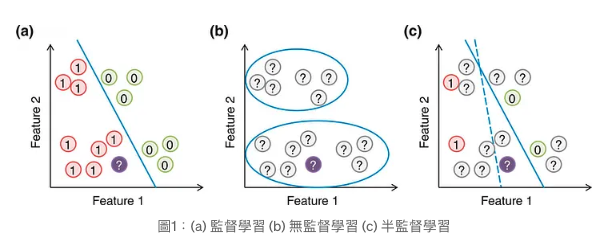

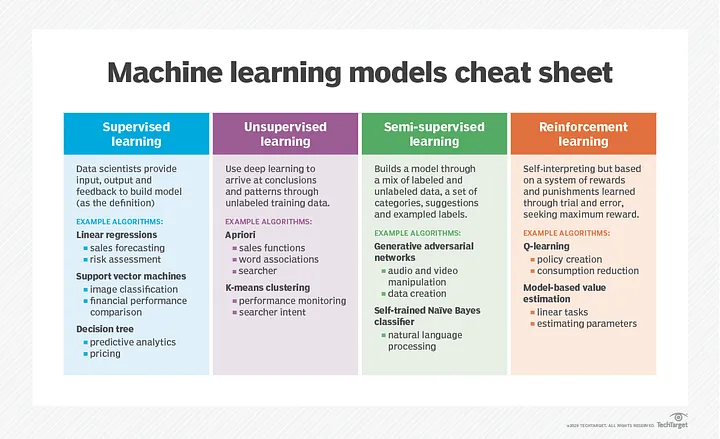

## Supervised Related Learning

### 監督學習（Supervised Learning）

監督學習是一種機器學習方法，是指使用大量的標記資料進行訓練，應用的方向大致可分為分類、迴歸，為目前最常見的作法。主要用於有明確標籤的數據集。在此類型的學習中，機器學習模型從訓練數據中學習，將輸入數據映射到已知輸出（標籤）。

**機器學習**：

- **支持向量機（SVM）**：廣泛用於分類問題。例如，用於二元分類的線性SVM可以有效地區分兩個類別。
- **隨機森林**：用於分類和回歸問題，由多棵決策樹組成，對於處理過擬合比單一決策樹更有優勢。

**深度學習**：

- **卷積神經網絡（CNN）**：常用於圖像識別和處理，通過模仿人類視覺系統工作原理來識別物體。
- **循環神經網絡（RNN）**：特別適合處理序列數據，如時間序列預測或語言模型。

在視覺任務領域裡面，Supervised Learning常用的任務包含：

1. 圖像分類 Image Classification
2. 物體檢測 Object Detection
3. 特徵點檢測 Keypoint Detection
4. 實例分割 Instance Segmentation
5. 圖像描述 Image Captioning


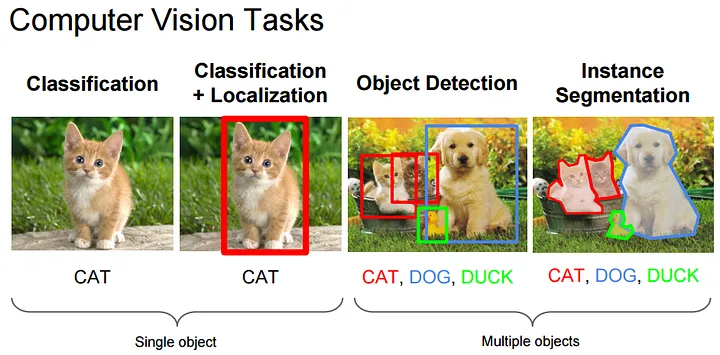

優點：

機器學習就要記得一件事：資料與標註越多效果越好。因此如果要求最佳的預測精度而不考慮其他因素的情況下，監督學習永遠是第一選擇。

監督學習的評估方式也是最簡單直接的，在缺少標註數據的情況下評估學習效果會變得更加困難。



缺點：

監督學習的缺點很明顯：需要標註。標註需要時間與金錢。以標註成本最低的圖像分類為例，圖像分類Open Source數據集ImageNet包含1,281,167的訓練集+50,000的驗證集。如果尋求外部的數據標註公司，分類任務都是以張數計價；越困難的任務標註成本也越大，例如目標檢測的估價大多是以標註框來計算，在同樣的圖片量級會比分類任務貴出好幾倍。

簡單的程式碼：

In [ ]:
# 簡單的隨機森林分類器示例
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

data = load_iris()
X = data['data']
y = data['target']

clf = RandomForestClassifier(n_estimators=10)
clf.fit(X, y)

### 非監督學習（Unsupervised Learning）

是指使用大量未標記的資料，藉由資料本身的特性找出潛在的規則，應用的方向有聚類、降維以及待會要介紹的自監督式學習 (Self-Supervised Learning)。
順便列舉無監督學習在圖像領域常用的深度學習算法：

1. GAN (Generative Adversarial Network)
2. Auto-Encoder
3. VAE (Variational Auto-Encoder)

**機器學習**：

- **Clustering**：如K-means用於將數據點分為多個群組，這些群組在特徵空間中彼此相近。
- **Dimension Reduction**：如PCA用於減少數據的維度，同時保持數據中最重要的變異性。

**深度學習**：

- **自編碼器（Autoencoder）**：用於學習數據編碼的神經網絡，通常用於特徵學習和降維。
- **變分自編碼器（VAE）**：除了執行降維外，還可以生成新的數據實例。

無監督學習在圖像領域有以下經典應用：

1. 圖像生成 Image Generation
2. 風格遷移 Style Transfer
3. 圖像編輯 Image Edition

優點

對於不可能標註的任務而言，無監督學習是你唯一的選擇。對於極具前瞻性的任務或研究，無監督學習結合其他機器學習方法極有可能是你需要探索的方向。

無監督學習的資料成本很低。試想如果你的機器學習服務能夠一直收集數據而不標註，同時還能保證精度持續上升，對你跟老闆都是多麼輕鬆寫意的一件事情。



缺點

無監督學習對資料的要求比較高。例如對贓數據的容忍較低，也對數據對齊(Data Alignment)有較大的要求。以人臉生成任務為例，所有的人臉中心線都是垂直的(參考圖3)。

無監督學習通常需要更複雜的建模以及算力要求。



建議的使用時機

1. 可以做沙箱實驗時，例如：推薦系統、博奕遊戲
2. 隨機生成類的任務，例如：人臉生成、海報生成、詞曲生成
3. 只需區分正常/**異常的任務，例如：視頻異動檢測、信號處理領域**

簡單程式碼範例：

In [ ]:
# K-means 聚類示例
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, centers=6, cluster_std=0.60, random_state=0)

kmeans = KMeans(n_clusters=6)
kmeans.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

### 半監督學習（Semi-Supervised Learning）

則是介於監督式學習和非監督式學習之間，結合少量的標記資料與其他大量未標記的資料一起使用，應用的方向有 Noisy Student、Meta Pseudo Labels、Generative methods 等。半監督學習的目標與監督學習完全相同，差別在資料集中存在部分的標注缺失。

**機器學習**：

- **Ladder Networks**：可以同時處理標記和未標記數據，透過一個分層的神經網絡結構進行學習。

**深度學習**：

- **生成對抗網絡（GAN）**：通過生成器和判別器的對抗過程學習數據的分佈，可用於半監督學習。

半監督學習的方法有很多，但總歸就是用某種特殊的規則或是方法來估計unlabeled data的真實類別。一般最經典的策略是Self-Training：

1. 先利用labeled data去訓練一個預測函數
2. 逐步去預測剩下的unlabeled data(預測結果稱為psudo label)，並更新預測函數
3. 直到所有data都變成labeled data為止


需要注意的是，套用Self-Training方法的資料本身需要符合Low-Density Separation(LDS)假設。用經驗論來解釋的話，通常越簡單的任務越符合這個假設。

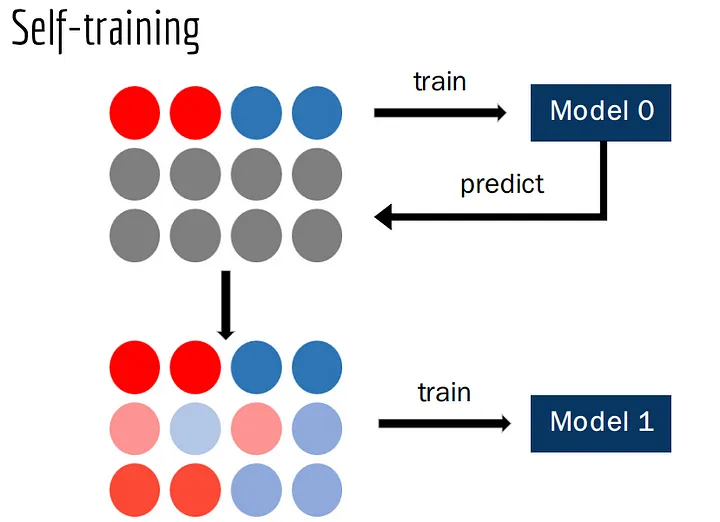

優點

標註成本較低，並且可以適用於大部分的任務。對於監督學習來說曠日廢時標註，切換到半監督學習就可以大量減少成本。對於線上需要持續優化的機器學習系統來說，只需要少量標注是非常吸引人的。



缺點

對於Self-Training類的方法，需要符合Low-Density Seperation假設才能成立；但是大部分的應用很難符合這個假設。



如果你的任務要切換成半監督學習但無法簡單套用Self-Training的話，你的機器學習演算法可能需要引用並嘗試各種創新方法，很可能是修改到足以發論文的地步。

建議的引用時機
1. 符合Low-Density Seperation假設的任務，例如：交通號誌分類(Maybe)
2. 如果有少量的標注人力，可以結合Active Learning來使用
3. 當資料標註成本無法被滿足，但是資料取得成本很低的時候

Low-Density Separation 假設

在半監督學習中，特別是在使用 Self-Training 方法時，**Low-Density Separation 假設**是一個關鍵的前提。這個假設認為最佳的決策邊界應該位於輸入空間中數據點稀少的區域。換句話說，它假設不同類別的數據之間存在一個低密度區域，學習算法應該利用這些區域來判斷類別邊界。

這個假設是基於觀察到的現象，即在很多實際應用中，同一類的數據點傾向於聚集在一起，而不同類的數據點之間會有明顯的空隙。這使得模型能夠更容易地識別和利用這些空隙作為類別分界。



Active Learning

**Active Learning** 是一種機器學習框架，其中學習算法可以主動選擇它想要標記的數據點。這種學習方式非常適合標記成本高昂的情況，因為它允許模型自己決定哪些數據最有價值，從而可能減少需要標記的數據量，同時保持或提升學習性能。

在 Active Learning 中，通常有一個循環過程：模型初步訓練於少量標記數據上，然後模型評估未標記數據點的信息量，選擇最有可能提高模型性能的數據點提交給專家進行標記，之後更新模型。這個過程重複進行，直到達到某個性能閾值或標記預算耗盡。

Active Learning 特別適用於數據標註成本高昂但數據獲取成本相對低廉的場景，例如醫學影像分類，其中專業人員的時間非常寶貴，但未標記的數據可能很容易獲得。

In [ ]:
# 使用 LabelSpreading 進行半監督學習
from sklearn.semi_supervised import LabelSpreading
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=100)
y[:50] = -1  # 隱藏一半的標籤

label_spread = LabelSpreading(kernel='rbf', alpha=0.2)
label_spread.fit(X, y)

### 自監督學習（Self-Supervised Learning）

Self-Supervised Learning 就是屬於 Unsupervised Learning 的一種，透過挖掘大量無標記資料中本身的資訊，人為地製造標籤（pretext），如此一來就可以使用監督式學習的方式進行訓練，如同其名為通過自己來監督自己。目的是希望模型能夠學習到資料中的通用 representation，並應用至不同的下游任務裡。



Self-Supervised Learning 不僅是在NLP領域，在CV, 語音領域也有很多經典的工作，如下圖2所示。它可以分成3類：Data Centric, Prediction (也叫 Generative) 和 Constractive。

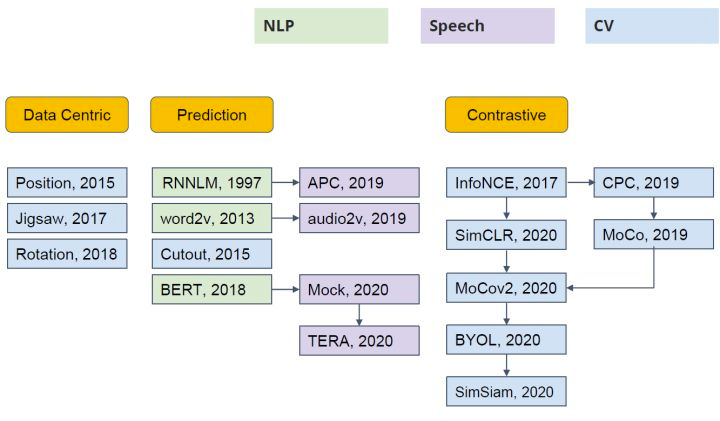

https://hackmd.io/@YungHuiHsu/BkxaZH-x5


自監督學習(SSL)的訓練分為兩階段:

in a task-agnostic way(以任務無關的方式)

使用大量的無標籤數據將模型訓練至初步成形，希望模型能夠學習到一種通用的特徵表達(Representation)用於下游任務 (Downstream Tasks)。


in a task-specific way

使用帶標籤的相對小量數據，根據對應的下游任務(以是語音、文本或是圖像等各種模態)，進一步將模型精煉到位(fine-tune)。

此階段理論上可以用相對小的數據量進行訓練，因為模型在第一階段已經學習到資料的特徵(模型的參數已經大致成形)

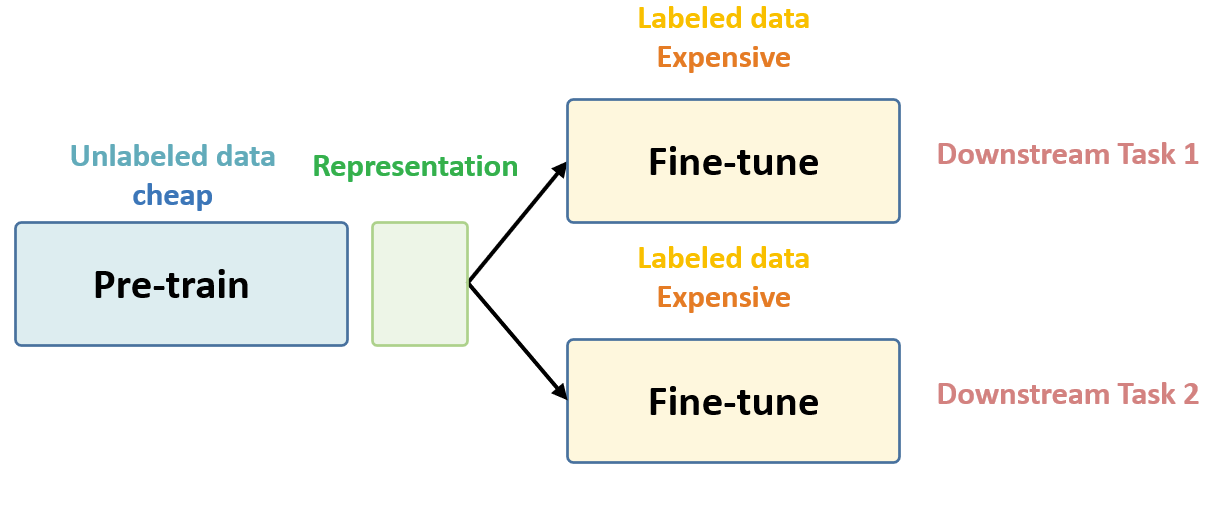

[自監督式學習 Self-Supervised Learning for Computer Vision 之概述
](https://medium.com/ching-i/%E8%87%AA%E7%9B%A3%E7%9D%A3%E5%BC%8F%E5%AD%B8%E7%BF%92-self-supervised-learning-for-computer-vision-%E4%B9%8B%E6%A6%82%E8%BF%B0-b0decf770abf)

**機器學習**：

- 較少見，但在特定領域如異常檢測中有應用。

**深度學習**：

- **BERT**：通過預測句子中的遺漏單詞來學習語言的深層特徵。BERT，能在一個挖空15%內容的句子中，預測字彙並補上這些句子的空白。除了NLP，圖像的填空是更具挑戰性的任務，但現在也已經能夠過拼圖與著色問題的解法來預測。
- **GPT**：通過預測句子中下一個單詞來訓練模型。

In [ ]:
from transformers import BertTokenizer, BertForMaskedLM
import torch

# 初始化 tokenizer 和模型
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForMaskedLM.from_pretrained('bert-base-uncased')

# 準備輸入數據，其中包含一個遮罩符號 [MASK]
input_text = "Hello, my dog is [MASK]."
inputs = tokenizer(input_text, return_tensors="pt")

# 使用模型進行預測
with torch.no_grad():
    outputs = model(**inputs)
    predictions = outputs.logits

# 獲取最可能的遮罩填充選項
predicted_index = torch.argmax(predictions[0, inputs['input_ids'][0] == tokenizer.mask_token_id], dim=1)
predicted_token = tokenizer.convert_ids_to_tokens(predicted_index)[0]

print(f'Original text: "{input_text}"')
print(f'Filled text: "{input_text.replace(tokenizer.mask_token, predicted_token)}"')


https://www.youtube.com/watch?v=hwo8Sn7sLlo

## 強化學習(Reinforcement Learning)

是透過獎懲的機制，讓機器在環境中進行 trial and error，並從中自我學習以取得最大的 Reward，應用的方向有 DQN、Temporal-Difference Learning 等。

機器透過每一次與環境互動來學習，以取得最大化的預期利益。運用強化式學習的方式，我們不標註任何資料，但告訴它所採取的哪一步是正確、那一步是錯誤的，根據反饋的好壞，機器自行逐步修正、最終得到正確的結果。能使非監督式學習達成一定程度的正確性，就不能缺少強化式學習的方式。若機器自行辨識特徵與分類，將某張大象的照片預測成長頸鹿，則人類給予錯誤的訊息。機器會再次辨認特徵及分類。透過一次一次正確與錯誤的學習，最後的預測就會越來越精準。

強化學習的目的就是找到一個最好的Policy(策略)，可以讓reward最多!!!

強化學習的運作主要是仰賴動態環境中的資料—也就是會隨著外部條件變化而改變的資料，像是天氣或交通流量。強化學習演算法的目標，即是於找出能夠產生最佳結果的策略。強化學習之所以能達成目標，是藉著軟體當中被稱為主體 (agent)的部分在環境中進行探索、互動和學習的方法。

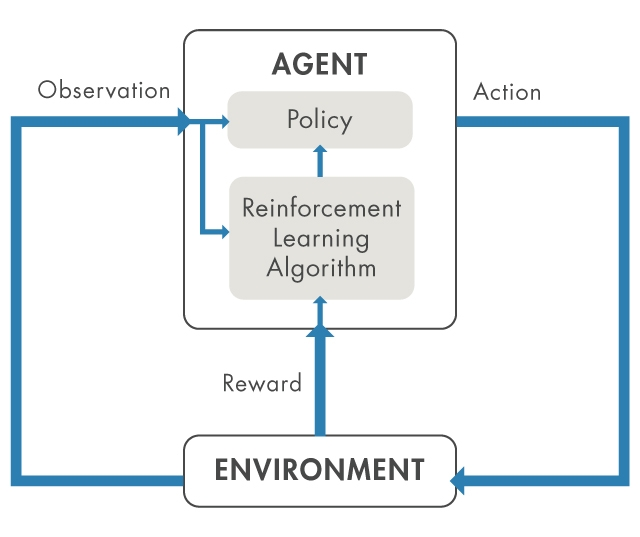

以自動駕駛為例子

自助停車(self-parking)是自動駕駛功能中極為重要的一環，目標是要讓車輛中的電腦(主體，agent)能準確地尋找位置並將車輛停入正確的停車格。在以下的範例中，環境(environment)指的是主體之外的所有事物—比如車輛本身的動態、附近的車輛、天候條件等等。訓練過程中，主體使用從各種感測器如攝影機、GPS、光學雷達(LiDAR)以及其他感測器讀取的資料來產生駕駛、煞車、與加速指令(動作，action)。為了學習如何從觀察去產生正確的動作(也就是策略調整，policy tuning)，主體會不斷反覆地嘗試錯誤來試著停車，而正確的動作會得到一個獎賞(reward)(強化，reinforced)以數值訊號表示(圖1)。

以此範例來說，訓練是透過一個訓練演算法(training algorithm)來監督。這個訓練演算法（即主體的大腦）負責根據從感測器收集而來的資料、動作、與獎賞來調整主體的策略。經過訓練之後，車輛上的電腦應該只要使用調整過的策略和感測器資料便能進行自主停車。



利用強化學習來訓練一個主體，主要包含五個步驟：

1. 建立環境：定義出一個環境，讓主體可以在裡面進行學習，包含主體與環境之間的介面也須被定義出來。這個環境可以是一個模擬模型，也可能是真實的物理系統。經過模擬的環境通常是作為第一步的較好選擇，因為它較為安全且容許實驗操作。
2. 定義獎賞：具體定義獎賞的訊號，供主體用來衡量其表現（與執行目標相比），以及訊號如何在環境中被計算。獎賞的設計可能會需要經過幾次的疊代才能達到完備。
3. 建立主體：主體由策略和訓練演算法組合而成，所以你會需要：
- 選擇一個代表策略的方法 (比如利用類神經網路或是查找表)。思考一下，你希望如何去建構這些參數和邏輯以成為主體的決策部分。
- 選擇適當的訓練演算法。現代大部分的強化學習演算法多仰賴類神經網路，因為這是處理大量狀態/動作空間和複雜的問題的好方法。
4. 訓練及驗證主體：你還需要設置訓練的選項(例如停止的標準)，並訓練主體來調整策略。驗證經過訓練策略的最簡單的方法就是模擬了。
5. 策略的佈署：如何呈現已經被訓練好的策略？舉例來說，可以用C/C++或CUDA程式碼等方式來表示。此時你已經不需要擔心主體和訓練演算法了—因為到此階段，策略已經被轉為一個獨立的決策系統可直接執行。

以下是使用 Python 和 OpenAI Gym 庫實現強化學習的一個簡單範例。在這個範例中，我們將訓練一個主體來平衡 CartPole，這是一個經典的強化學習問題，其中目標是防止一個杆子從小車上倒下。



In [ ]:
!pip install gym

In [ ]:
import gym
import numpy as np

# 1. 建立環境
env = gym.make('CartPole-v1')

# 2. 定義獎賞（獎勵直接由環境提供，通常不需額外定義）

# 3. 建立主體（簡單策略：如果杆子向左傾斜，則向左移動，反之亦然）
def policy(state):
    return 0 if state[2] < 0 else 1

# 4. 訓練及驗證主體
def train_agent(episodes):
    for episode in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0

        while not done:
            action = policy(state)  # 根據策略選擇動作
            state, reward, done, info = env.step(action)  # 執行動作並獲取新狀態
            total_reward += reward
            if done:
                print(f"Episode {episode + 1}: Total Reward = {total_reward}")
                break

# 5. 策略的佈署（這裡繼續使用 Python，實際佈署可能需要更複雜的實現）
train_agent(100)  # 訓練100個episode


Episode 1: Total Reward = 26.0
Episode 2: Total Reward = 39.0
Episode 3: Total Reward = 40.0
Episode 4: Total Reward = 39.0
Episode 5: Total Reward = 36.0
Episode 6: Total Reward = 31.0
Episode 7: Total Reward = 55.0
Episode 8: Total Reward = 58.0
Episode 9: Total Reward = 49.0
Episode 10: Total Reward = 42.0
Episode 11: Total Reward = 53.0
Episode 12: Total Reward = 38.0
Episode 13: Total Reward = 57.0
Episode 14: Total Reward = 61.0
Episode 15: Total Reward = 57.0
Episode 16: Total Reward = 37.0
Episode 17: Total Reward = 38.0
Episode 18: Total Reward = 41.0
Episode 19: Total Reward = 45.0
Episode 20: Total Reward = 56.0
Episode 21: Total Reward = 48.0
Episode 22: Total Reward = 46.0
Episode 23: Total Reward = 39.0
Episode 24: Total Reward = 49.0
Episode 25: Total Reward = 34.0
Episode 26: Total Reward = 38.0
Episode 27: Total Reward = 47.0
Episode 28: Total Reward = 47.0
Episode 29: Total Reward = 61.0
Episode 30: Total Reward = 34.0
Episode 31: Total Reward = 25.0
Episode 32: Total

https://medium.com/no-sliver-bullet/%E5%BC%B7%E5%8C%96%E5%AD%B8%E7%BF%92-reinforcement-learning-%E6%A1%88%E4%BE%8B%E5%88%86%E6%9E%90-cartpole-v1-6261d8c66b17

1. **建立環境**：我們使用 `gym.make('CartPole-v1')` 來創建一個 CartPole 環境。
2. **定義獎賞**：在這個例子中，Gym 環境會自動處理獎勵的計算。
3. **建立主體**：為了簡單起見，使用一個基於杆子角度的非常基本的策略。
4. **訓練及驗證**：通過多次重複試驗來訓練主體，並打印出每個試驗的總獎勵。
5. **策略的佈署**：這裡展示了如何在 Python 環境中運行和測試策略。如果需要部署到實際的應用中，可能需要將策略轉換成更高效的格式或語言。

這個範例提供了一個基本的強化學習模型，適合初學者理解和入門。对于更复杂的问题和模型，您可能需要使用更高级的算法如 Q-learning、DQN 或 A3C。

[10個QA快速了解自監督式學習
](https://www.ithome.com.tw/news/133433)

[強化學習(Reinforcement Learning)：入門指南](https://www.terasoft.com.tw/support/tech_articles/reinforcement_learning_a_brief_guide.asp)

[[機器學習 ML NOTE] Reinforcement Learning 強化學習(DQN原理)
](https://medium.com/%E9%9B%9E%E9%9B%9E%E8%88%87%E5%85%94%E5%85%94%E7%9A%84%E5%B7%A5%E7%A8%8B%E4%B8%96%E7%95%8C/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-ml-note-reinforcement-learning-%E5%BC%B7%E5%8C%96%E5%AD%B8%E7%BF%92-dqn-%E5%AF%A6%E4%BD%9Catari-game-7f9185f833b0)

## 集成學習（Ensemble Learning）

在機器學習中，模型單獨運行的成效可能不佳，這時候我們可能就得更多個模型來協助完成任務。集成學習 (Ensemble Learning) 又稱為整體學習、整合學學習，是以一種有系統的方式將多個監督式模型結合在一起，希望透過多個模型產出更強大的一個模型。在很多情況下，集成學習模型能非常有效提高準確率。




根據集成的方式不同，主要可以分成以下六類。

1. Bagging (Bootstrapped Aggregation)
2. Boosting
3. Stacking
4. Patch Learning
5. Averaging
6. Voting

還有超多


Averaging

對於Averaging來說，概念最為簡單，就是在每個sub-model前面乘上一個常數，再整合起來平均。其有分為兩種，一種為simple averaging另一個為weighting averaging。

- Simple averaging
就和我們在aggregation models中所講的averaging一樣，也就是當模型訓練完畢要結合的過程中，我們對於每個sub-model所採的權重為1

- Weighting Averaging
就是在aggregation models中所講的weighting，當模型訓練完後要結合sub-model的時候，每個sub-model有不同的權重。



Voting
而voting的機制是以表決的方式選出最好的model。其也分為好幾種，像是Hard Voting和Soft Voting

- Hard Voting

這是voting中最常見的方式，也叫hard voting，以分類問題來說，其方法就是每個model針對每個類別進行投票，像是我們現在有M1、M2、M3、M4四種分類器和A、B、C三種類別，假如M1在辨識資料後，得到60%的A、30%的B、10%的C，則M1在這次投票中投給A，但是如果A、B、C辨識後得出來的比例都小於50%則該model為reject option。所以根據這樣的邏輯，當輸入一筆資料後，就會用這樣的方式選出得分最高的類別。

- Soft Voting

其概念也和Majority Voting很像，但是採計的方式不同，其是看每個model在每個類別比例的加總，像是M1、M2、M3、M4在A類別分別得到60%、20%、90%、10%，則我們在A得到的積分為1.8，然後用相同的方法計算B和C，最後得出最高積分的類別。

Bagging (Bootstrapped Aggregation) 自助重抽總合法

Bagging 指的是我們將訓練資料進行隨機抽樣以產生多組不同的訓練資料，並且使用多個模型進行預測，如下圖為 Bagging 之架構。

大多時候我們會傾向使用多個同樣的機器學習模型，尤其是未經過整理的 Decision tree (決策樹) ，並將先前切分好的訓練資料丟進模型裡面，最後由所有模型進行投票或是平均來產生結果。

- Random Forest：通過多個決策樹來進行分類或回歸，每棵樹在訓練時使用了不同的數據樣本和特徵。
- Gradient Boosting Machine (GBM)：通過逐步建立弱學習器（如決策樹），每個弱學習器都試圖彌補前一個弱學習器的錯誤。

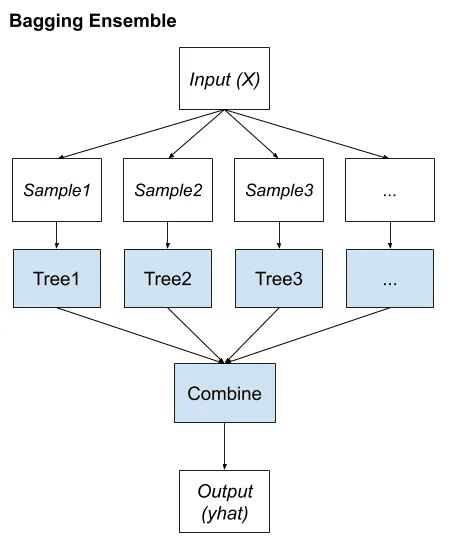

Boosting 推升法

Boosting 主要是想透過更多的機器學習模型，來修正已訓練模型的結果。例如第二個模型會修改第一個模型的預測結果，而第三個模型則會修改第二個模型的預測結果。

在 Boosting 方法進行中，訓練資料會保持相同，並運用預測結果對特定資料進行增加或減少權重後放入下一個模型當中。目標是希望訓練後，新的模型在遇到這些較難預測的資料時可以表現得更好。我們會不斷的重複這些步驟，不斷地增加模型，並且新的模型會將過去表現不好的地方改善。

Boosting 中每一個模型都是有關聯的，將每一個模型預測完成後才會有下一個模型的生成。代表的方法有 AdaBoost, Gradient Boosting 以及 XGBoost，這些方法都是產生非常多棵的樹，但每棵都是簡單的 Decision Tree，最終將所有 Decision Tree 的樹結合在一起才能產出最後的預測。



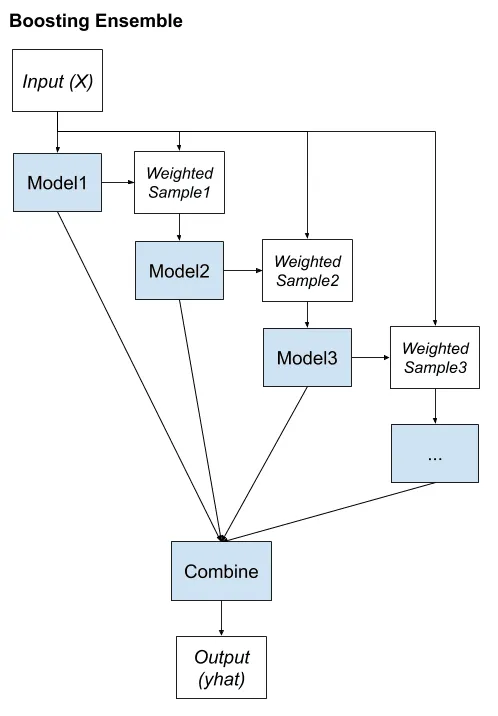

Stacking 堆疊法

Stacking 一樣是由多個模型組成，但是與 Boosting 和 Bagging 不同的地方是，每個模型可以選擇相同或不同的演算法，例如第一個模型選擇的演算法為 Logistic Regression 而第二個模型為選擇的演算法為 Decision Tree。訓練完多個模型後，我們要將這些模型合併在一起。合併的方式是另外訓練一個模型，這個模型把前面所有模型的輸出當成輸入，並產生出最終預測結果。

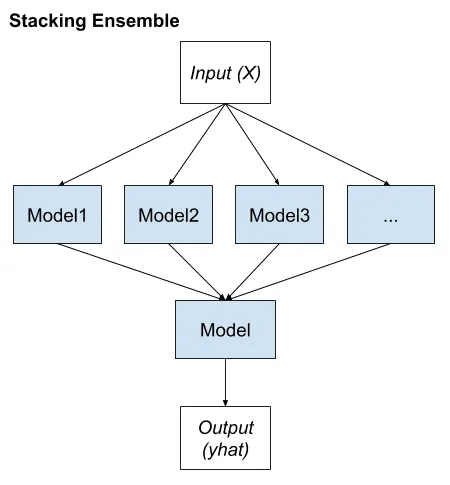

Patch Learning 區域學習

Patch Learning 能夠有效的掌握表現不佳的區間，經過訓練一個全域的模型後透過一個機器學習模型找出誤差大的 Patch，透過多個斷點的學習我們會得到 Global Model，Patch 1 Model，Patch 2 Model … Patch n Model。



Patch Learning 主要包括三個部分

給定 Patch Model 要被訓練的次數 L

1. 使用所有訓練資料訓練一個初始的全域模型
2. 挑出較難預測的資料，再放入個別 Patch (總共會有一開始給定的訓練次數 L 個)進行區域訓練
3. 從訓練資料中移除放入個別 Patch 的訓練資料，再用剩下的訓練資料來更新全域模型


當輸入資料時，先判斷這個輸入是不是在 Patch 模型中，是則執行 Patch 模型，不是則執行更新後的全域模型，以下是 Patch Learning 的架構圖。

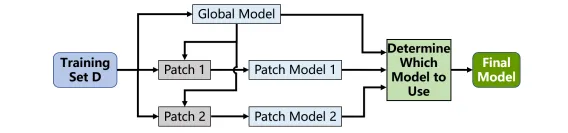

1. [集成學習-Ensemble Learning
](https://medium.com/data-science-navigator/0%E9%9B%86%E6%88%90%E5%AD%B8%E7%BF%92-ensemble-learning-f575461889bd
)
2. [機器學習_學習筆記系列(26)：集成學習簡介(Introduction to Ensemble Learning)
](https://tomohiroliu22.medium.com/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E5%AD%B8%E7%BF%92%E7%AD%86%E8%A8%98%E7%B3%BB%E5%88%97-26-%E9%9B%86%E6%88%90%E5%AD%B8%E7%BF%92%E7%B0%A1%E4%BB%8B-introduction-to-ensemble-learning-985c5b09546f)

範例：集成神經網絡



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

# 載入資料
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], -1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], -1)).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 建立多個模型
def create_model():
    model = Sequential([
        Dense(512, activation='relu', input_shape=(784,)),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

models = [create_model() for _ in range(5)]

# 訓練每個模型
for model in models:
    model.fit(x_train, y_train, epochs=5, batch_size=128, verbose=0)

# 集成預測
predictions = np.array([model.predict(x_test) for model in models])
ensemble_predictions = np.mean(predictions, axis=0)

# 評估集成模型
ensemble_accuracy = np.mean(np.argmax(ensemble_predictions, axis=1) == np.argmax(y_test, axis=1))
print("Ensemble Accuracy:", ensemble_accuracy)


假設我們在一個簡單的回歸問題上使用Patch Learning方法：



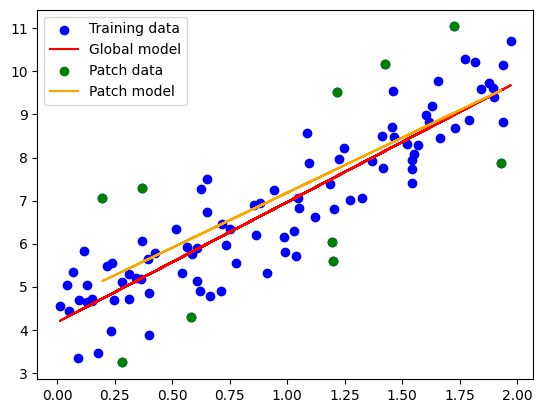

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 生成一些訓練數據
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# 訓練全域模型
global_model = LinearRegression()
global_model.fit(X, y)
y_pred = global_model.predict(X)

# 計算誤差
errors = np.abs(y - y_pred)
threshold = np.percentile(errors, 90)  # 選擇90百分位作為阈值

# 識別誤差較大的資料點
patch_data = X[errors.flatten() > threshold]
patch_labels = y[errors.flatten() > threshold]

# 訓練Patch模型
patch_model = LinearRegression()
patch_model.fit(patch_data, patch_labels)

# 移除誤差較大的資料點，並用剩餘的資料更新全域模型
remaining_data = X[errors.flatten() <= threshold]
remaining_labels = y[errors.flatten() <= threshold]
global_model.fit(remaining_data, remaining_labels)

# 繪製結果
plt.scatter(X, y, color='blue', label='Training data')
plt.plot(X, global_model.predict(X), color='red', label='Global model')
plt.scatter(patch_data, patch_labels, color='green', label='Patch data')
plt.plot(patch_data, patch_model.predict(patch_data), color='orange', label='Patch model')
plt.legend()
plt.show()


1. **生成訓練數據**：我們生成了一些線性回歸的訓練數據。
2. **訓練全域模型**：用所有的訓練數據訓練一個全域模型。
3. **計算誤差並識別誤差較大的資料點**：計算每個數據點的誤差，選擇誤差最大的前10%的資料點作為Patch數據。
4. **訓練Patch模型**：用識別出的Patch數據訓練一個新的模型。
5. **更新全域模型**：移除誤差較大的資料點，然後用剩下的資料更新全域模型。
6. **繪製結果**：展示全域模型和Patch模型的擬合結果。



當有新數據進入時，我們可以先檢查這些新數據是否在之前識別出的誤差較大的資料點範圍內（即Patch模型的範圍內），如果是，則使用Patch模型進行預測，否則使用更新後的全域模型進行預測。



## 其他

### 元學習（Meta Learning）

元學習（Meta-Learning）的核心在於教會模型如何學習學習本身。這表示訓練模型時，目標不只是讓它完成特定任務，更重要的是，讓它學會從少量的數據中迅速學到新的知識或技能、未知的任務或數據。這種適應性確保模型能即時調整自己，進行有效的學習和預測。

Learn to learn.

元學習的應用範圍很廣，例如可以用在政府的輿情評論，或者Google評論上。這表示，如果將來我們想要將其應用於新的領域進行分析或學習，我們就可以先讓像是GPT-4這樣的大型模型，學習一些基礎的脈絡。

meta learning 就是在幫助我們尋找 hyperparameter。





Metadata


**機器學習**：少見，但有些方法如MAML（Model-Agnostic Meta-Learning）。
**深度學習**：較多應用，尤其在少樣本學習（Few-Shot Learning）中。


[元學習 Meta Learning_李弘毅_ML2021#16](https://medium.com/@ZH_Shen/%E5%85%83%E5%AD%B8%E7%BF%92-meta-learning-%E6%9D%8E%E5%BC%98%E6%AF%85-ml2021-16-8a8bef6ed5da)

[🤖大模型學習新領域的策略：元學習（Meta-Learning）
](https://medium.com/@ruyuhuang0114/%E5%A4%A7%E6%A8%A1%E5%9E%8B%E5%AD%B8%E7%BF%92%E6%96%B0%E9%A0%98%E5%9F%9F%E7%9A%84%E7%AD%96%E7%95%A5-%E5%85%83%E5%AD%B8%E7%BF%92-meta-learning-3cb256edf28a)

[【機器學習 2022】各種奇葩的元學習 (Meta Learning) 用法
](https://www.youtube.com/watch?v=QNfymMRUg3M)

[META LEARNING 筆記：META LEARNING VS ML
](https://hyuanverse.com/meta-learning-note-meta-learning-vs-ml/)


### 少樣本學習（Few-Shot Learning）

藉助過往經驗中學到的學習方法，模型能夠即使只擁有少數樣本，也能對新任務做出合理的預測。

**機器學習**：相對少見，多數依賴於深度學習方法。
**深度學習**：常用於元學習方法，如Prototypical Networks、Matching Networks。


# References

1. [自監督式學習 Self-Supervised Learning for Computer Vision 之概述
](https://medium.com/ching-i/%E8%87%AA%E7%9B%A3%E7%9D%A3%E5%BC%8F%E5%AD%B8%E7%BF%92-self-supervised-learning-for-computer-vision-%E4%B9%8B%E6%A6%82%E8%BF%B0-b0decf770abf)

2. [機器學習任務：監督學習/半監督學習/無監督學習
](https://u9534056.medium.com/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E4%BB%BB%E5%8B%99-%E7%9B%A3%E7%9D%A3%E5%AD%B8%E7%BF%92-%E5%8D%8A%E7%9B%A3%E7%9D%A3%E5%AD%B8%E7%BF%92-%E7%84%A1%E7%9B%A3%E7%9D%A3%E5%AD%B8%E7%BF%92-9b75972f91d6)